# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, how="left")

# Display the data table for preview
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
num_of_mice = len(combined_df["Mouse ID"].value_counts())
num_of_mice


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dup_mice



array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(dup_mice)==False]
clean_df.head(50)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [7]:
# Checking the number of mice in the clean DataFrame.
mice_num = len(clean_df["Mouse ID"].value_counts())
mice_num

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_vol = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median_tumor_vol = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var_tumor_vol = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std_tumor_vol = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem_tumor_vol = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summ_stat_df = pd.DataFrame({"Mean Tumor Volume":mean_tumor_vol, 
                            "Median Tumor Volume":median_tumor_vol, 
                           "Tumor Volume Variance":var_tumor_vol, 
                           "Tumor Volume Std. Dev.":std_tumor_vol, 
                           "Tumor Volume Std. Err.":sem_tumor_vol})


summ_stat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summ_stat_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summ_stat_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

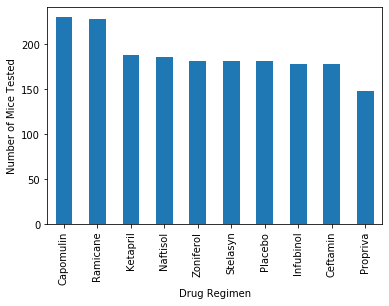

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
num_of_timepoints = clean_df["Drug Regimen"].value_counts()
bar_plot = num_of_timepoints.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()


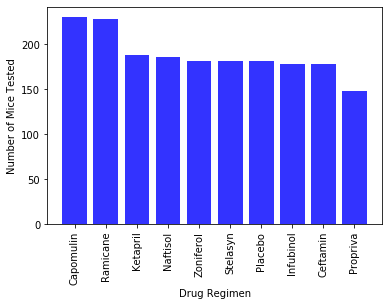

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x = num_of_timepoints.index.values
y = num_of_timepoints.values
plt.bar(x, y, color='b', alpha=0.8, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.show()


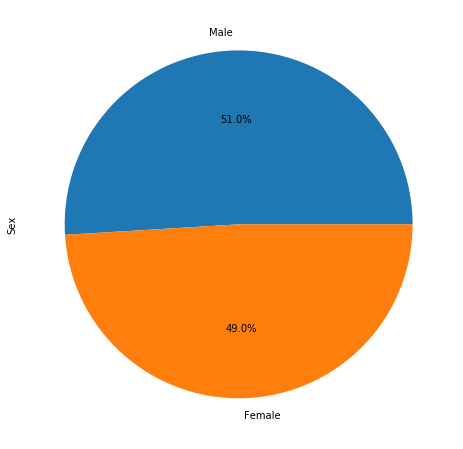

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = ["Male","Female"]
sex = clean_df["Sex"].value_counts()
sex.plot(kind="pie", figsize=(12,8), y="Total Count",
                            autopct="%1.1f%%")
plt.savefig("/Users/mdcummings/Desktop/Data Analysis/Boot Camp/MatPlotLib Challenge/Pymaceuticals/data/pandapie.png")
plt.show()

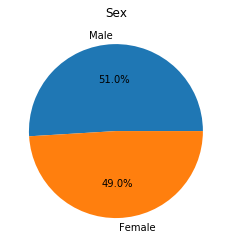

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=gender, autopct="%1.1f%%")
plt.title("Sex")
plt.savefig("/Users/mdcummings/Desktop/Data Analysis/Boot Camp/MatPlotLib Challenge/Pymaceuticals/data/pltpie.png")
plt.show()




## Quartiles, Outliers and Boxplots

In [159]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_mice = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ramicane_mice = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_mice = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_mice = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]


# Start by getting the last (greatest) timepoint for each mouse
Capomulin_max = capomulin_mice.groupby('Mouse ID').max()['Timepoint']
Ramicane_max = ramicane_mice.groupby('Mouse ID').max()['Timepoint']
Infubinol_max = Infubinol_mice.groupby('Mouse ID').max()['Timepoint']
Ceftamin_max = Ceftamin_mice.groupby('Mouse ID').max()['Timepoint']



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
cap_max_df = pd.DataFrame(Capomulin_max)
ram_max_df = pd.DataFrame(Ramicane_max)
inf_max_df = pd.DataFrame(Infubinol_max)
ceft_max_df = pd.DataFrame(Ceftamin_max)
cap_merge_df = pd.merge(cap_max_df, clean_df, on=("Mouse ID","Timepoint"),how="left")
ram_merge_df = pd.merge(ram_max_df, clean_df, on=("Mouse ID","Timepoint"),how="left")
inf_merge_df = pd.merge(inf_max_df, clean_df, on=("Mouse ID","Timepoint"),how="left")
ceft_merge_df = pd.merge(ceft_max_df, clean_df, on=("Mouse ID","Timepoint"),how="left")
cap_last = cap_merge_df["Tumor Volume (mm3)"]
ram_last = ram_merge_df["Tumor Volume (mm3)"]
inf_last = inf_merge_df["Tumor Volume (mm3)"]
ceft_last = ceft_merge_df["Tumor Volume (mm3)"]

In [160]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
combined_plot = [cap_last, ram_last, inf_last, ceft_last]

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = clean_df.loc[clean_df["Drug Regimen"] == regimen, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"{regimen}'s potential outliers: {outliers}")

cap_quartiles = cap_last.quantile([0.25,0.5,0.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print('---------------------')
print(f"Capumulin IQR: {cap_iqr}")
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")
print('---------------------')

ram_quartiles = ram_last.quantile([0.25,0.5,0.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*cap_iqr)
ram_upper_bound = ram_upperq + (1.5*cap_iqr)
print(f"Ramicane IQR: {ram_iqr}")
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")
print('---------------------')

inf_quartiles = inf_last.quantile([0.25,0.5,0.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*cap_iqr)
inf_upper_bound = inf_upperq + (1.5*cap_iqr)
print(f"Infubinol IQR: {inf_iqr}")
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")
print('---------------------')

ceft_quartiles = ceft_last.quantile([0.25,0.5,0.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq-ceft_lowerq
ceft_lower_bound = ceft_lowerq - (1.5*cap_iqr)
ceft_upper_bound = ceft_upperq + (1.5*cap_iqr)
print(f"Ceftamin IQR: {ceft_iqr}")
print(f"Values below {ceft_lower_bound} could be outliers.")
print(f"Values above {ceft_upper_bound} could be outliers.")
print('---------------------')
   

Capomulin's potential outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------
Capumulin IQR: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
---------------------
Ramicane IQR: 9.098536719999998
Values below 19.887674359999995 could be outliers.
Values above 52.33180146000001 could be outliers.
---------------------
Infubinol IQR: 11.477135160000003
Values below 42.375812499999995 could be outliers.
Values above 77.19853804 could be outliers.
---------------------
Ceftamin IQR: 15.577752179999997
Values below 37.04928265999999 could be outliers.
Values above 75.97262522 could be outliers.
---------------------


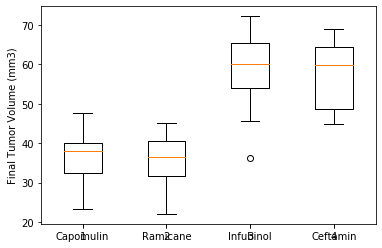

In [150]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
plt.xticks([1,2,3,4], treatments)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(combined_plot)
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

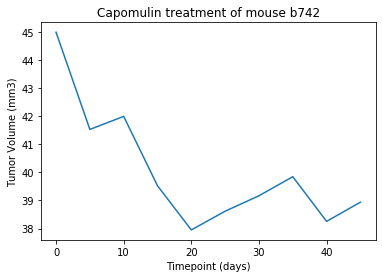

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mice_df = pd.DataFrame(capomulin_mice)
# capomulin_mice_df
cap_mouse_b742 = capomulin_mice_df.loc[capomulin_mice_df['Mouse ID'] == "b742"]
timepoint = np.arange(0,60,10)
x_values = cap_mouse_b742["Timepoint"]
y_values = cap_mouse_b742["Tumor Volume (mm3)"]
plt.plot(x_values,y_values)
plt.xlabel('Timepoint (days)')
plt.title("Capomulin treatment of mouse b742")
plt.ylabel("Tumor Volume (mm3)")




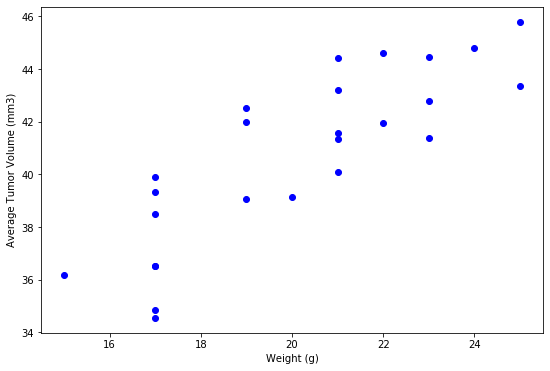

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_mean = capomulin_mice_df.groupby(['Mouse ID']).mean()
fig1, ax1 = plt.subplots(figsize=(9,6))
plt.scatter(cap_mean['Weight (g)'],cap_mean['Tumor Volume (mm3)'], color="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation coefficient between weight and average tumor volume is 0.84


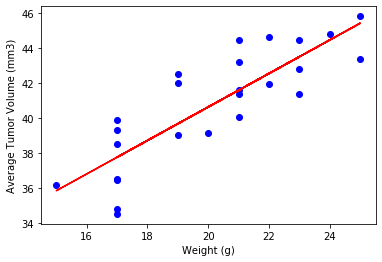

In [64]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between weight and average tumor volume is {round(st.pearsonr(cap_mean['Weight (g)'],cap_mean['Tumor Volume (mm3)'])[0],2)}") 

x_values = cap_mean['Weight (g)']
y_values = cap_mean['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cap_mean['Weight (g)'],cap_mean['Tumor Volume (mm3)'], color="blue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()